# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units = "imperial"
url = 'http://api.openweathermap.org/data/2.5/weather?'
city_list = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
latitude = []
longitude = []
max_temp = []

i = 0
my_set = 1

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    response = requests.get(query_url).json()
    
    if i > 49:
        i = 0
        my_set += 1
    try:
        i += 1
        print(f"Processing Record {i} of Set {my_set}| {city}")
        city_list.append(response['name'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        
    except:
        print("City not found.  Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| east london
Processing Record 2 of Set 1| rikitea
Processing Record 3 of Set 1| hambantota
Processing Record 4 of Set 1| atar
Processing Record 5 of Set 1| cabo san lucas
Processing Record 6 of Set 1| tuatapere
Processing Record 7 of Set 1| longyearbyen
Processing Record 8 of Set 1| mar del plata
Processing Record 9 of Set 1| zatoka
Processing Record 10 of Set 1| jamestown
Processing Record 11 of Set 1| talnakh
Processing Record 12 of Set 1| butaritari
Processing Record 13 of Set 1| vitim
Processing Record 14 of Set 1| cape town
Processing Record 15 of Set 1| albany
Processing Record 16 of Set 1| grand river south east
City not found.  Skipping...
Processing Record 17 of Set 1| zhangye
Processing Record 18 of Set 1| ushuaia
Processing Record 19 of Set 1| busselton
Processing Record 20 of Set 1| ambilobe
Processing Record 21 of Set 1| tumannyy
City not found.  Skipping...
Processing Record 22 of Set 1| 

Processing Record 41 of Set 4| attawapiskat
City not found.  Skipping...
Processing Record 42 of Set 4| arraial do cabo
Processing Record 43 of Set 4| richards bay
Processing Record 44 of Set 4| saleaula
City not found.  Skipping...
Processing Record 45 of Set 4| souillac
Processing Record 46 of Set 4| poum
Processing Record 47 of Set 4| klyuchi
Processing Record 48 of Set 4| berlevag
Processing Record 49 of Set 4| lyantonde
Processing Record 50 of Set 4| dwarka
Processing Record 1 of Set 5| hamina
Processing Record 2 of Set 5| bolekhiv
Processing Record 3 of Set 5| kibondo
Processing Record 4 of Set 5| illapel
Processing Record 5 of Set 5| nouadhibou
Processing Record 6 of Set 5| udayagiri
Processing Record 7 of Set 5| barentsburg
City not found.  Skipping...
Processing Record 8 of Set 5| haines junction
Processing Record 9 of Set 5| khatanga
Processing Record 10 of Set 5| alofi
Processing Record 11 of Set 5| olafsvik
City not found.  Skipping...
Processing Record 12 of Set 5| polunoc

Processing Record 26 of Set 8| maiduguri
Processing Record 27 of Set 8| vestmannaeyjar
Processing Record 28 of Set 8| iquique
Processing Record 29 of Set 8| almeirim
Processing Record 30 of Set 8| jaisinghnagar
Processing Record 31 of Set 8| temecula
Processing Record 32 of Set 8| lima
Processing Record 33 of Set 8| amahai
Processing Record 34 of Set 8| makakilo city
Processing Record 35 of Set 8| sentyabrskiy
City not found.  Skipping...
Processing Record 36 of Set 8| burica
City not found.  Skipping...
Processing Record 37 of Set 8| san quintin
Processing Record 38 of Set 8| nuuk
Processing Record 39 of Set 8| primo tapia
Processing Record 40 of Set 8| dourados
Processing Record 41 of Set 8| rawlins
Processing Record 42 of Set 8| portland
Processing Record 43 of Set 8| tazovskiy
Processing Record 44 of Set 8| la grande
Processing Record 45 of Set 8| pondicherry
Processing Record 46 of Set 8| ruatoria
City not found.  Skipping...
Processing Record 47 of Set 8| formosa
Processing Recor

Processing Record 16 of Set 12| padang
Processing Record 17 of Set 12| eregli
Processing Record 18 of Set 12| kutum
Processing Record 19 of Set 12| coahuayana
Processing Record 20 of Set 12| abai
Processing Record 21 of Set 12| arman
Processing Record 22 of Set 12| usinsk
Processing Record 23 of Set 12| san carlos de bariloche
Processing Record 24 of Set 12| karratha
Processing Record 25 of Set 12| balyaga
Processing Record 26 of Set 12| hofn
Processing Record 27 of Set 12| bandarban
Processing Record 28 of Set 12| saldanha
Processing Record 29 of Set 12| waingapu
Processing Record 30 of Set 12| nizwa
Processing Record 31 of Set 12| surt
Processing Record 32 of Set 12| salym
Processing Record 33 of Set 12| buala
Processing Record 34 of Set 12| bilibino
Processing Record 35 of Set 12| ulaangom
Processing Record 36 of Set 12| peniche
Processing Record 37 of Set 12| meulaboh
Processing Record 38 of Set 12| naze
Processing Record 39 of Set 12| mandan
Processing Record 40 of Set 12| camana


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_list,
    "Cloudiness": cloudiness,  
    "Country": country,  
    "Date": date,   
    "Humidity": humidity,     
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,    
    "Wind Speed": wind_speed   
}
weather_dict


{'City': ['East London',
  'Rikitea',
  'Hambantota',
  'Atar',
  'Cabo San Lucas',
  'Tuatapere',
  'Longyearbyen',
  'Mar del Plata',
  'Zatoka',
  'Jamestown',
  'Talnakh',
  'Butaritari',
  'Vitim',
  'Cape Town',
  'Albany',
  'Zhangye',
  'Ushuaia',
  'Busselton',
  'Ambilobe',
  'Hasaki',
  'Mindelheim',
  'Inhambane',
  'Mataura',
  'Punta Arenas',
  'Yakeshi',
  'Kerchevskiy',
  'Kavieng',
  'Kapaa',
  'Ucluelet',
  'Saint-Philippe',
  'Bredasdorp',
  'Linxia',
  'Qaanaaq',
  'Avarua',
  'Lata',
  'Taoudenni',
  'Airai',
  'Gat',
  'Luderitz',
  'Kikwit',
  'Lebu',
  'Vaini',
  'Barrow',
  'Provideniya',
  'Port Hawkesbury',
  'Iqaluit',
  'Hovd',
  'Haifa',
  'Pangnirtung',
  'Tochtepec',
  'Pringsewu',
  'Bronnoysund',
  'Hobart',
  'Buckingham',
  'Severo-Kurilsk',
  'Two Rivers',
  'Teya',
  'Katsuura',
  'Sao Joao da Barra',
  'Odienne',
  'Faanui',
  'Isangel',
  'Nhlangano',
  'Nanortalik',
  'Pahalgam',
  'Pochutla',
  'Fort Nelson',
  'New Norfolk',
  'Bethel',
  'Ken

In [6]:
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,East London,20,ZA,1578469445,88,-33.02,27.91,75.20,8.05
1,Rikitea,0,PF,1578469461,80,-23.12,-134.97,76.87,18.32
2,Hambantota,40,LK,1578469462,70,6.12,81.12,87.80,12.75
3,Atar,7,MR,1578469462,18,20.52,-13.05,52.02,12.59
4,Cabo San Lucas,100,MX,1578469202,86,22.89,-109.91,68.00,0.96
...,...,...,...,...,...,...,...,...,...
552,Bourail,29,NC,1578469584,68,-21.57,165.50,73.47,7.29
553,New Plymouth,100,NZ,1578469584,64,-39.06,174.08,57.00,5.99
554,Sao Miguel do Araguaia,100,BR,1578469584,91,-13.28,-50.16,73.36,3.11
555,Victoria,75,BN,1578469584,83,5.28,115.24,84.20,9.17


In [13]:
weather_data.to_csv('./weather_data.csv')

In [7]:
weather_data.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
# convert the unix date to a readable date for our plot
mydate = weather_data.iloc[0, 3]
plot_date = datetime.datetime.fromtimestamp(
        int(mydate)
    ).strftime('%m/%d/%Y')
plot_date

'01/07/2020'

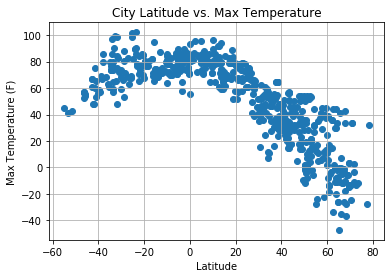

In [14]:
# Latitude vs. Max Temperature Plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('max_temp.png')
plt.show()

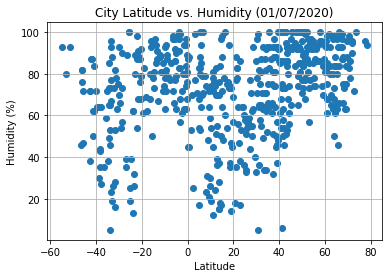

<Figure size 432x288 with 0 Axes>

In [10]:
# Latitude vs. Humidity Plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('humidity.png')
plt.show()

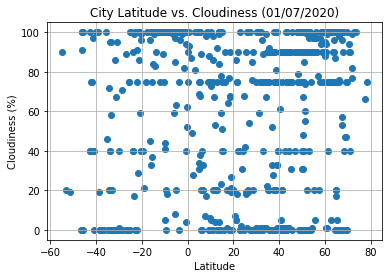

<Figure size 432x288 with 0 Axes>

In [11]:
#Latitude vs Cloudiness Plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title(f"City Latitude vs. Cloudiness ({plot_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig('cloudiness.png')

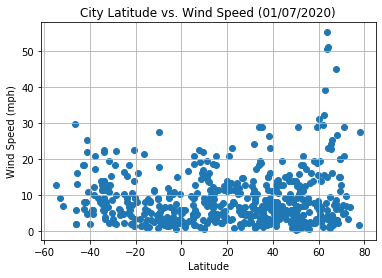

<Figure size 432x288 with 0 Axes>

In [12]:
# Latitude vs. Wind Speed Plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title(f"City Latitude vs. Wind Speed ({plot_date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig('wind_speed.png')

Three Observable Trends Based on the Data
1.  Max Temperature:  Max temperatures were higher in the latitudes closer to the equator as opposed to extreme northern and extreme southern latitudes, 
2.  Cloudiness:  Datapoints appear to have horizontal line configuration.  May indicate that cloudiness is measured in discrete values in certain parts of the world. 
3.  Wind speed is somewhat consistent across all latitudes but extreme outliers are more likely to occur at higher northern latitudes. 